<a href="https://colab.research.google.com/github/NDsasuke/Autocorrelation-function-Diagnostics-and-prediction/blob/main/Diagnostics%20and%20prediction/Residual%20Analysis/Anomaly_Detection_using_Residual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Importing necessary libraries**: This segment imports the required libraries for the analysis, including `pandas` for data handling, `numpy` for numerical computations, and `matplotlib.pyplot` for data visualization. It also imports the `IsolationForest` class from `sklearn.ensemble` and the `StandardScaler` class from `sklearn.preprocessing`.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


2. **Load the NAB dataset**: The code loads the NAB dataset from an online source. In this example, we use the "Twitter_volume_AMZN.csv" dataset, representing the number of tweets related to Amazon.


In [4]:
# Load the NAB dataset (example: realTweets)
url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv'
df = pd.read_csv(url)


3. **Extract timestamp and value columns**: The code extracts the timestamp and value columns from the dataset.


In [5]:
# Extract the timestamp and value columns
timestamp = pd.to_datetime(df['timestamp'])
values = df['value']


4. **Convert values to numpy array and reshape**: The code converts the values to a numpy array and reshapes it to a 2-dimensional array. This is necessary for compatibility with the Isolation Forest model.


In [6]:
# Convert values to numpy array and reshape
X = np.array(values).reshape(-1, 1)


5. **Scale the data**: The code scales the data using the `StandardScaler` to ensure that each feature has zero mean and unit variance.


In [7]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


6. **Fit the Isolation Forest model**: An instance of the `IsolationForest` class is created, specifying the `contamination` parameter to indicate the expected proportion of anomalies. The model is then fitted to the scaled data.


In [8]:
# Fit the Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(X_scaled)

IsolationForest(contamination=0.05)


7. **Predict anomalies**: The code calculates the anomaly scores using the `decision_function` method of the Isolation Forest model. It also predicts the anomaly labels using the `predict` method.


In [9]:
# Predict anomalies
anomaly_scores = model.decision_function(X_scaled)
anomaly_labels = model.predict(X_scaled)


8. **Visualize the anomaly scores**: This segment plots the anomaly scores over time, where higher scores indicate a higher likelihood of being an anomaly. The red dashed line at y=0 represents the threshold for classifying anomalies.


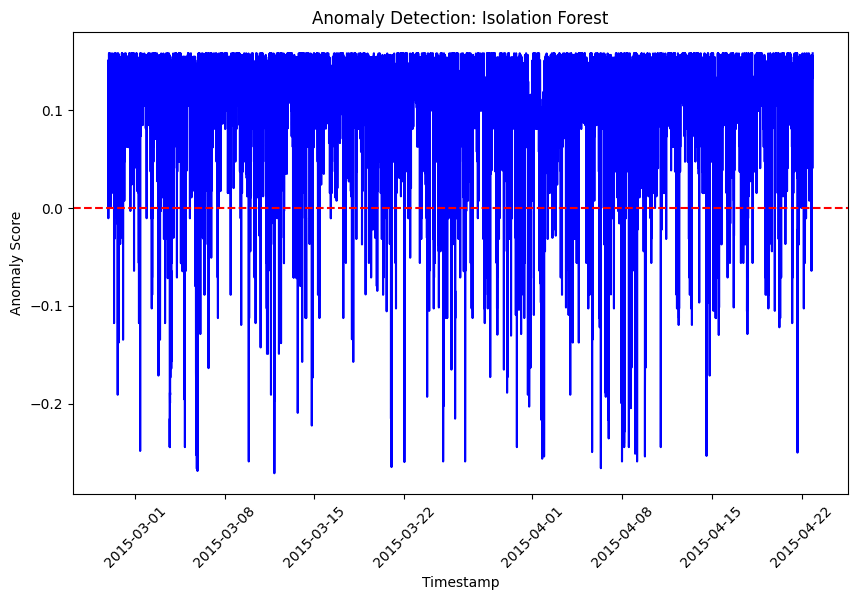

In [10]:
# Visualize the anomaly scores
plt.figure(figsize=(10, 6))
plt.plot(timestamp, anomaly_scores, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection: Isolation Forest')
plt.xticks(rotation=45)
plt.show()


9. **Visualize the detected anomalies**: The code identifies the indices of anomalies based on the predicted labels. It then plots the original data and highlights the detected anomalies in red.

By running this code, you will be able to perform anomaly detection using residual analysis on the NAB dataset, specifically using the Isolation Forest algorithm.

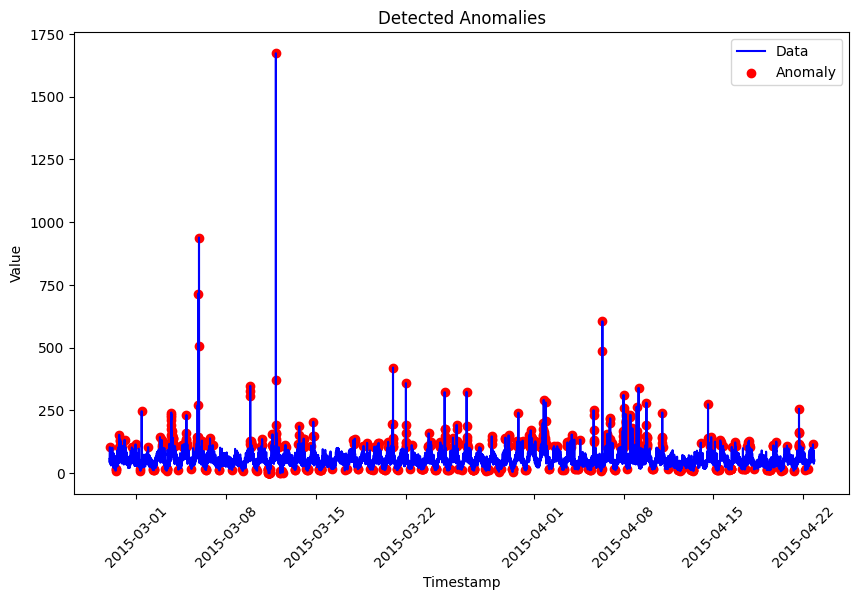

In [11]:
# Visualize the detected anomalies
anomaly_indices = np.where(anomaly_labels == -1)[0]
anomaly_timestamps = timestamp.iloc[anomaly_indices]
anomaly_values = values.iloc[anomaly_indices]

plt.figure(figsize=(10, 6))
plt.plot(timestamp, values, color='b', label='Data')
plt.scatter(anomaly_timestamps, anomaly_values, color='r', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Detected Anomalies')
plt.xticks(rotation=45)
plt.legend()
plt.show()
